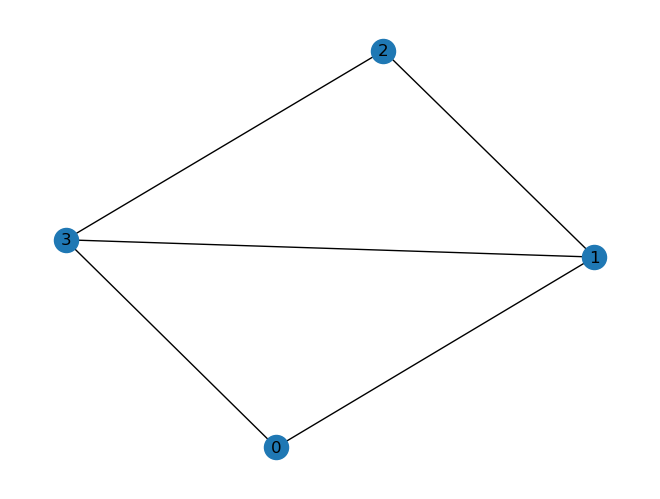

Optimal solution: [1. 0. 1. 0.]
Optimal value: [[1, 3], [0, 2]]


In [33]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from qiskit import Aer, QuantumCircuit
from qiskit_optimization.applications import Maxcut
from qiskit.utils import algorithm_globals
from qiskit.algorithms import QAOA
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit_optimization.problems import QuadraticProgram
from qiskit_optimization.converters import QuadraticProgramToQubo, LinearEqualityToPenalty

# 创建一个简单的图
num_nodes = 4
edges = [(0, 1), (1, 2), (2, 3), (3, 0), (1, 3)]
graph = nx.Graph(edges)
nx.draw(graph, with_labels=True)
plt.show()

# 计算Max-Cut问题的权重矩阵
weights = np.zeros([num_nodes, num_nodes])
for i, j in graph.edges():
    weights[i, j] = 1
    weights[j, i] = 1

# 定义QuadraticProgram对象
maxcut = Maxcut(weights)
qp = maxcut.to_quadratic_program()

# 将二次规划问题转换为QUBO
linear2penalty = LinearEqualityToPenalty()
qp_wo_linear = linear2penalty.convert(qp)
qp_to_qubo = QuadraticProgramToQubo()
qubo = qp_to_qubo.convert(qp_wo_linear)

# 获得QUBO的Ising模型
qubit_op, offset = qubo.to_ising()

# 使用QAOA求解Max-Cut问题
seed = 123
algorithm_globals.random_seed = seed
backend = Aer.get_backend("statevector_simulator")
qaoa = QAOA(reps=2, quantum_instance=backend)
optimizer = MinimumEigenOptimizer(qaoa)
result = optimizer.solve(qubo)

# 提取结果
x = result.x
print(f"Optimal solution: {x}")
print(f"Optimal value: {maxcut.interpret(x)}")




